In [69]:
import numpy as np
import scipy.stats as st
import pandas as pd
import os
import matplotlib.pyplot as plt

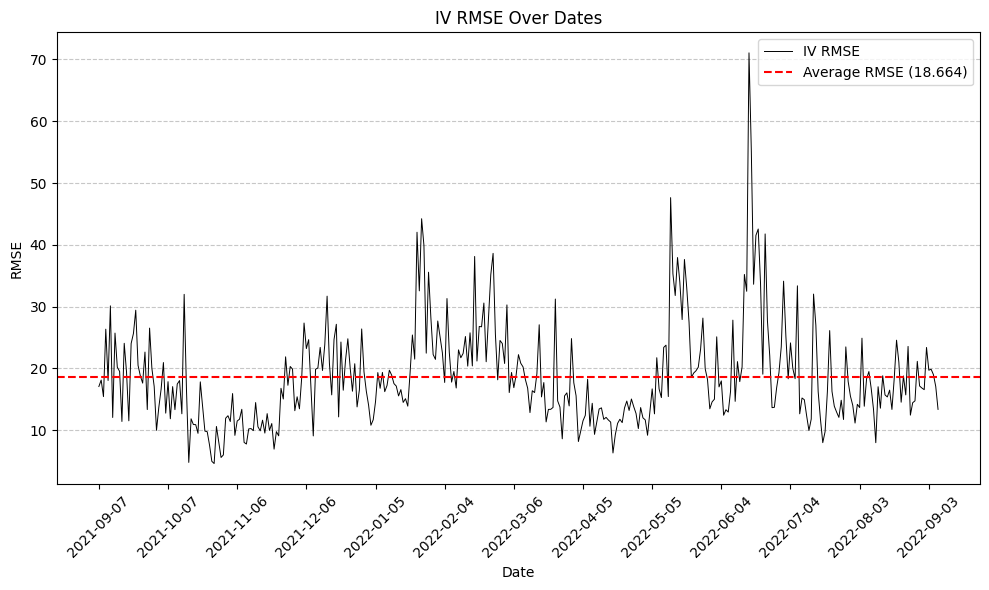

In [70]:
bs_results = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/bsm_calibration_results_final.csv')
avg_rmse_bs = bs_results['iv_rmse'].mean()

# Plot RMSE over the dates
plt.figure(figsize=(10, 6))
plt.plot(bs_results['date'], bs_results['iv_rmse'], linestyle='-', linewidth = 0.7, color='black', label='IV RMSE')
plt.axhline(avg_rmse_bs, color='red', linestyle='--', label=f'Average RMSE ({avg_rmse_bs:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(bs_results), 30), labels=bs_results['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\s'
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_69298/4087842428.py:31: SyntaxWarning: invalid escape sequence '\s'
  axes[0].set_title('Volatility parameter $\sigma$', fontsize=10)
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_69298/4087842428.py:43: SyntaxWarning: invalid escape sequence '\m'
  axes[2].set_title('Mean jump size $\mu_J$', fontsize=10)
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_69298/4087842428.py:49: SyntaxWarning: invalid escape sequence '\s'
  axes[3].set_title('Jump volatility $\sigma_J$', fontsize=10)


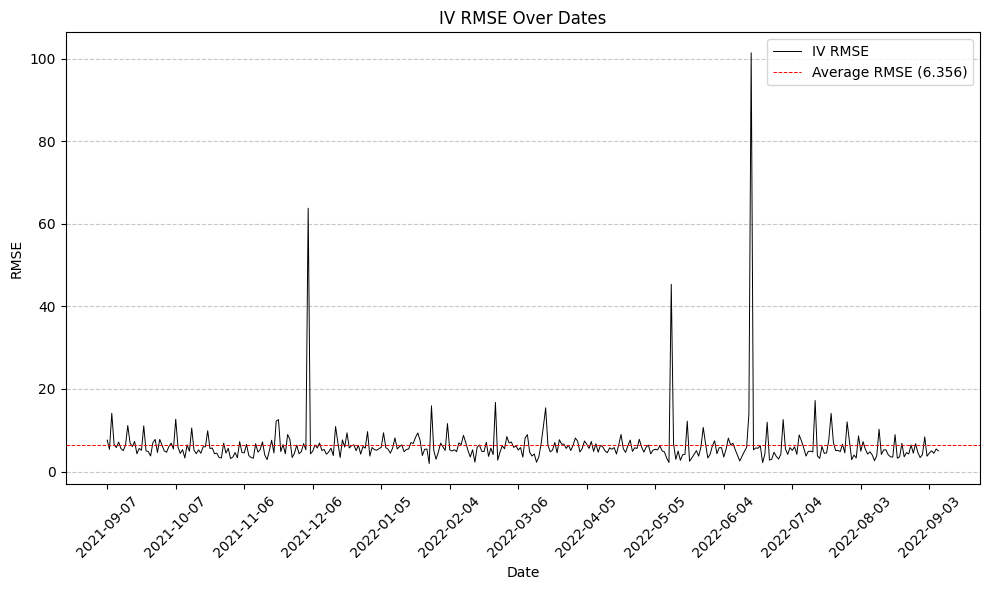

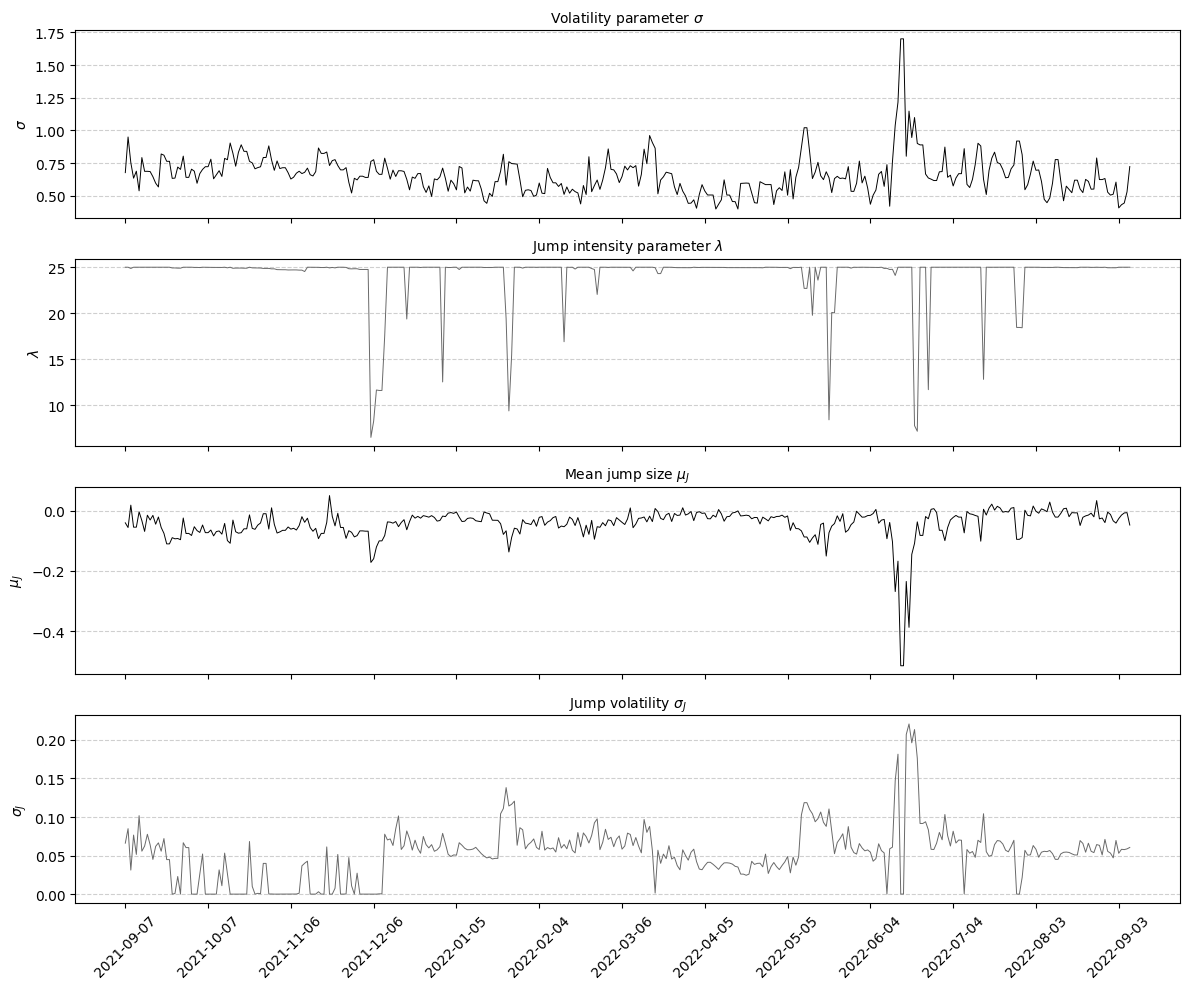

In [71]:
results_merton = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/merton_calibration_results_final2.csv')
avg_rmse_merton = results_merton['iv_rmse'].mean()

# Plot RMSE over the dates
plt.figure(figsize=(10, 6))
plt.plot(results_merton['date'], results_merton['iv_rmse'], linestyle='-', linewidth = 0.7, color='black', label='IV RMSE')
plt.axhline(avg_rmse_merton, color='red', linestyle='--', linewidth = 0.7, label=f'Average RMSE ({avg_rmse_merton:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(results_merton), 30), labels=results_merton['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Extract relevant series
dates = results_merton['date']
theta_sigma = results_merton['theta_σ']
theta_xi = results_merton['theta_ξ']
theta_muJ = results_merton['theta_μJ']
theta_sigmaJ = results_merton['theta_σJ']
rmse = results_merton['iv_rmse']

# Create figure with 5 subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

# Plot theta_σ
axes[0].plot(dates, theta_sigma, color='black', linewidth=0.7)
axes[0].set_ylabel(r'$\sigma$')
axes[0].set_title('Volatility parameter $\sigma$', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot theta_ξ
axes[1].plot(dates, theta_xi, color='dimgray', linewidth=0.7)
axes[1].set_ylabel(r'$\lambda$')
axes[1].set_title(r'Jump intensity parameter $\lambda$', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Plot theta_μJ
axes[2].plot(dates, theta_muJ, color='black', linewidth=0.7)
axes[2].set_ylabel(r'$\mu_J$')
axes[2].set_title('Mean jump size $\mu_J$', fontsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

# Plot theta_σJ
axes[3].plot(dates, theta_sigmaJ, color='dimgray', linewidth=0.7)
axes[3].set_ylabel(r'$\sigma_J$')
axes[3].set_title('Jump volatility $\sigma_J$', fontsize=10)
axes[3].grid(axis='y', linestyle='--', alpha=0.6)

# Format x-axis ticks
plt.xticks(ticks=range(0, len(dates), 30), labels=dates.iloc[::30], rotation=45)
plt.tight_layout()
plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\l'
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_69298/2899094549.py:32: SyntaxWarning: invalid escape sequence '\s'
  axes[0].set_title('Volatility $\sigma$', fontsize=10)
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_69298/2899094549.py:38: SyntaxWarning: invalid escape sequence '\l'
  axes[1].set_title('Jump intensity $\lambda$', fontsize=10)


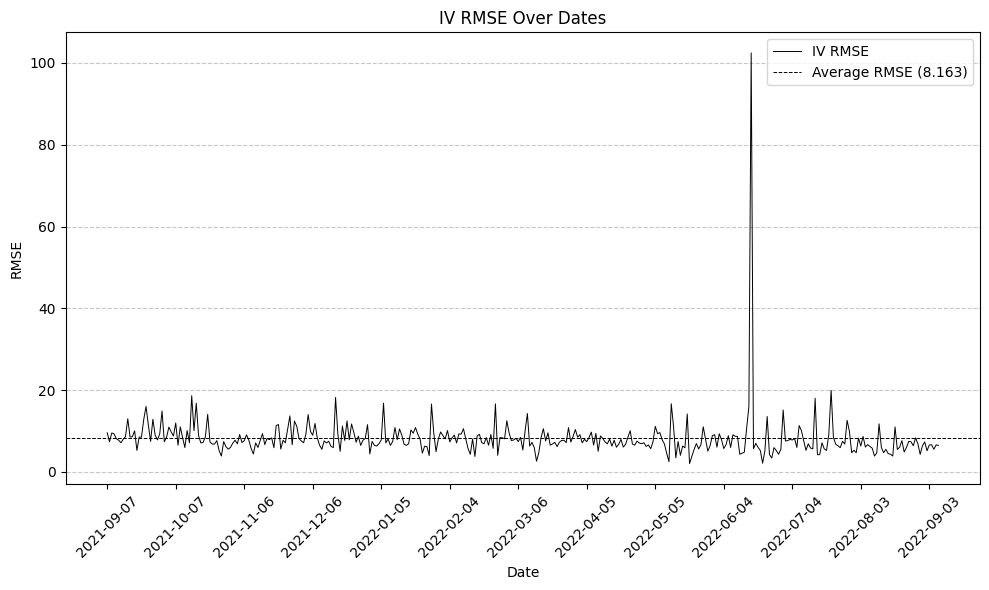

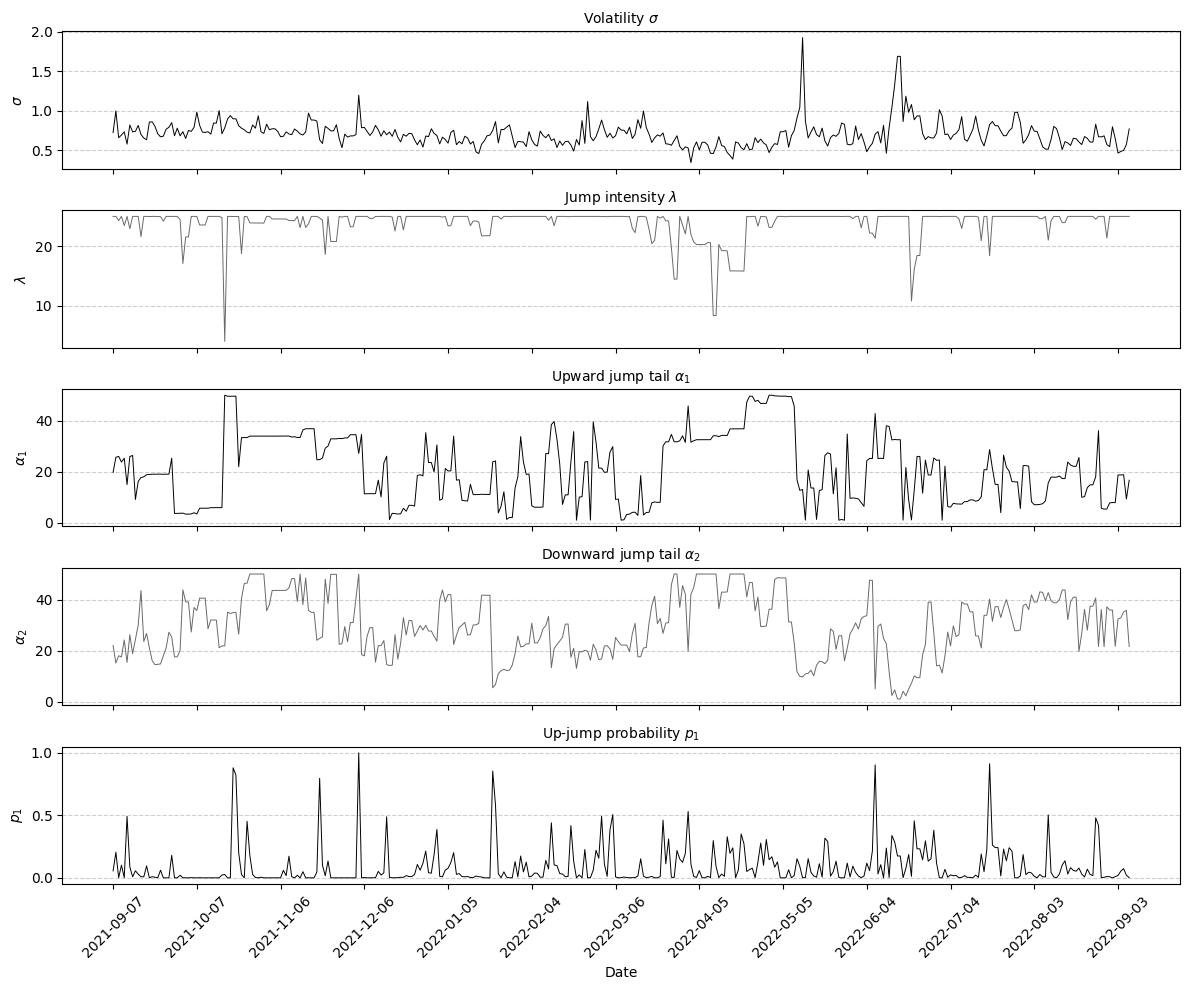

In [72]:
results_kou = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/kou_calibration_results_final.csv')
avg_relative_rmse_kou = (results_kou['iv_rmse'] / bs_results['iv_rmse']).mean()
avg_rmse_kou = results_kou['iv_rmse'].mean()

# Plot RMSE over the dates
plt.figure(figsize=(10, 6))
plt.plot(results_kou['date'], results_kou['iv_rmse'], linestyle='-', color='black', label='IV RMSE', linewidth=0.7)
plt.axhline(avg_rmse_kou, color='black', linestyle='--', linewidth=0.7, label=f'Average RMSE ({avg_rmse_kou:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(results_kou), 30), labels=results_kou['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Create figure with 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10), sharex=True)

dates = results_kou['date']
sigma = results_kou['theta_σ']
xi = results_kou['theta_ξ']
alpha1 = results_kou['theta_α1']  
alpha2 = results_kou['theta_α2'] 
p1 = results_kou['theta_p1']
rmse = results_kou['iv_rmse']

# σ
axes[0].plot(dates, sigma, color='black', linewidth=0.7)
axes[0].set_ylabel(r'$\sigma$')
axes[0].set_title('Volatility $\sigma$', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# ξ
axes[1].plot(dates, xi, color='dimgray', linewidth=0.7)
axes[1].set_ylabel(r'$\lambda$')
axes[1].set_title('Jump intensity $\lambda$', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# α₁
axes[2].plot(dates, alpha1, color='black', linewidth=0.7)
axes[2].set_ylabel(r'$\alpha_1$')
axes[2].set_title(r'Upward jump tail $\alpha_1$', fontsize=10) 
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

# α₂
axes[3].plot(dates, alpha2, color='dimgray', linewidth=0.7)
axes[3].set_ylabel(r'$\alpha_2$')
axes[3].set_title(r'Downward jump tail $\alpha_2$', fontsize=10)  # <- fixed
axes[3].grid(axis='y', linestyle='--', alpha=0.6)

# p₁
axes[4].plot(dates, p1, color='black', linewidth=0.7)
axes[4].set_ylabel(r'$p_1$')
axes[4].set_title('Up-jump probability $p_1$', fontsize=10)
axes[4].set_xlabel('Date')
axes[4].grid(axis='y', linestyle='--', alpha=0.6)

# Format x-axis ticks
plt.xticks(ticks=range(0, len(dates), 30), labels=dates.iloc[::30], rotation=45)
plt.tight_layout()
plt.show()


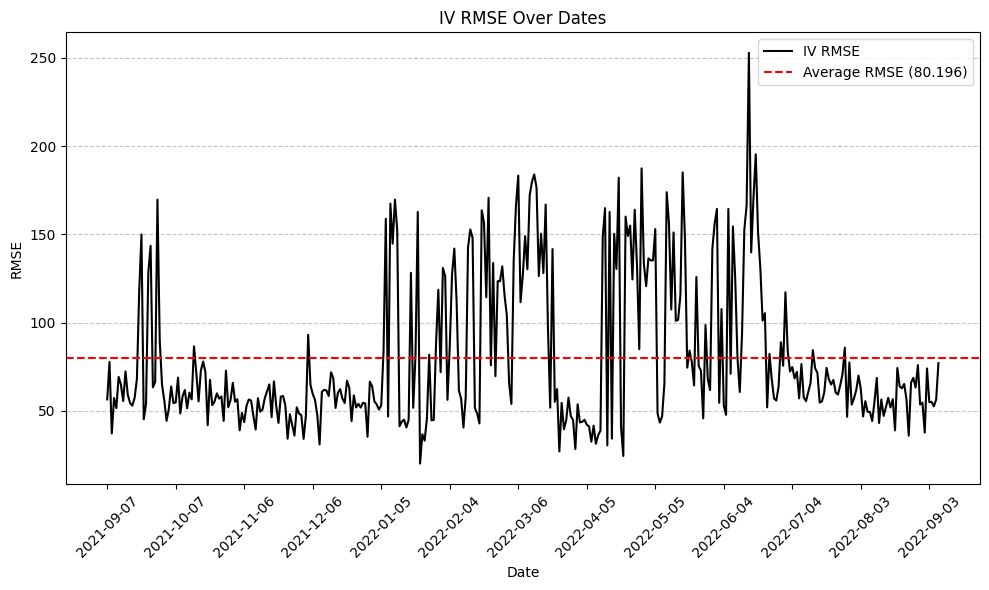

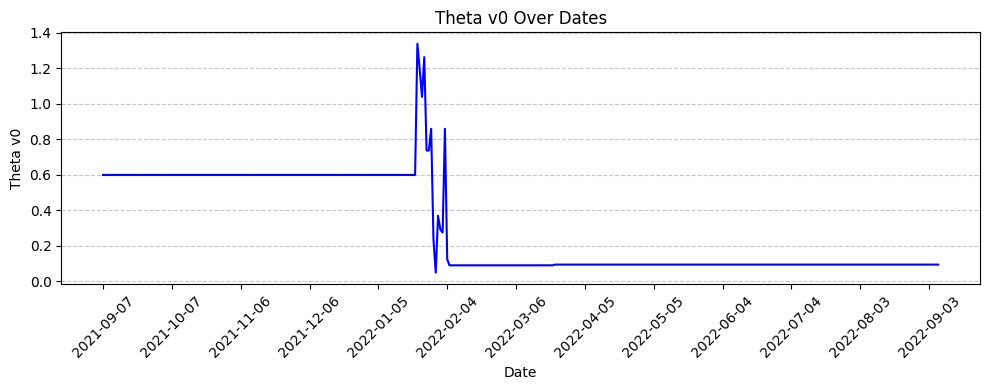

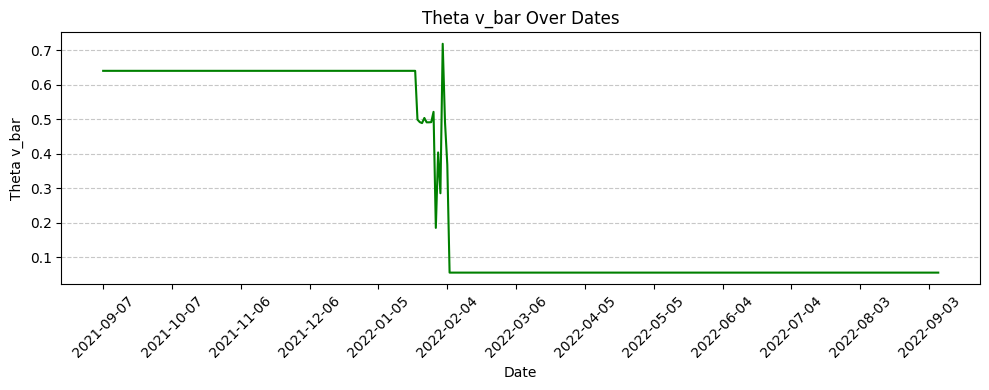

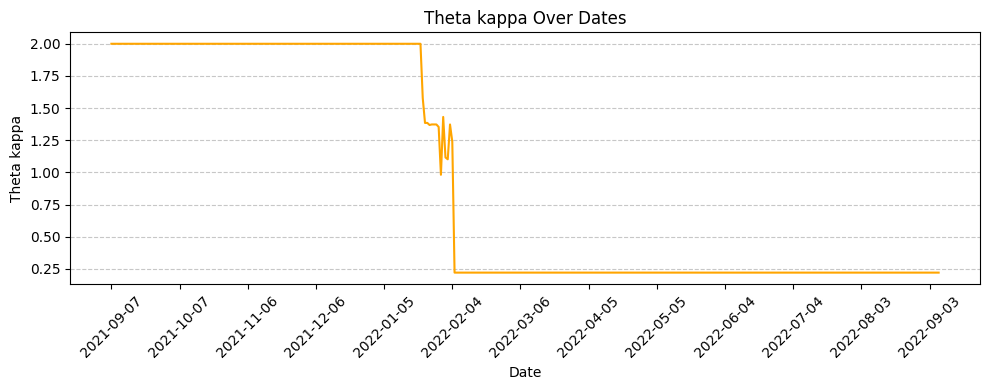

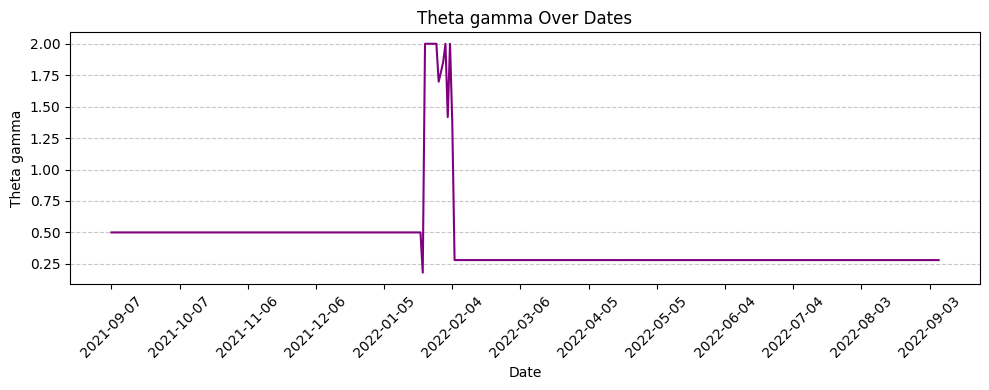

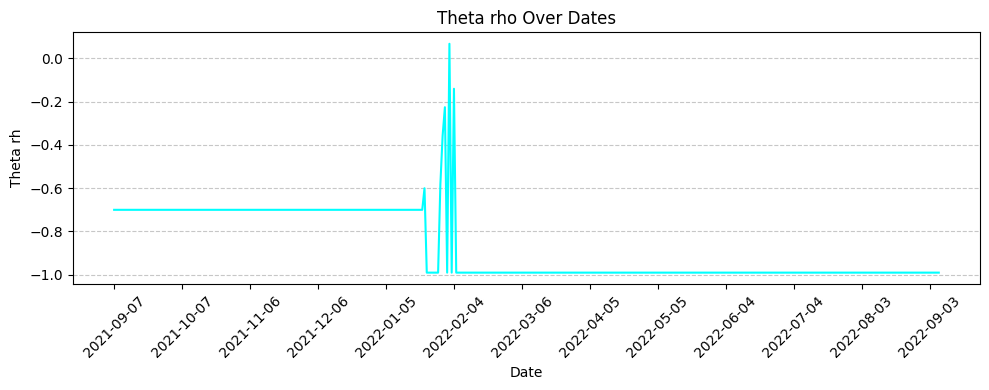

In [ ]:
results_heston = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/heston_calibration_results_final.csv')
avg_rmse_heston = results_heston['iv_rmse'].mean()

# v0, v_bar, kappa, gamma, rho
# Plot RMSE over the dates
plt.figure(figsize=(10, 6))
plt.plot(results_heston['date'], results_heston['iv_rmse'], linestyle='-', color='black', label='IV RMSE')
plt.axhline(avg_rmse_heston, color='red', linestyle='--', label=f'Average RMSE ({avg_rmse_heston:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(results_heston), 30), labels=results_heston['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Plot v0 over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_heston['date'], results_heston['theta_v0'], label='Theta v0', color='blue')
plt.xlabel('Date')
plt.ylabel('Theta v0')
plt.title('Theta v0 Over Dates')
plt.xticks(ticks=range(0, len(results_heston), 30), labels=results_heston['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot v_bar over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_heston['date'], results_heston['theta_v_bar'], label='Theta v_bar', color='green')
plt.xlabel('Date')
plt.ylabel('Theta v_bar')
plt.title('Theta v_bar Over Dates')
plt.xticks(ticks=range(0, len(results_heston), 30), labels=results_heston['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot kappa over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_heston['date'], results_heston['theta_kappa'], label='Theta kappa', color='orange')
plt.xlabel('Date')
plt.ylabel('Theta kappa')
plt.title('Theta kappa Over Dates')
plt.xticks(ticks=range(0, len(results_heston), 30), labels=results_heston['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot gamma over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_heston['date'], results_heston['theta_gamma'], label='Theta gamma', color='purple')
plt.xlabel('Date')
plt.ylabel('Theta gamma')
plt.title('Theta gamma Over Dates')
plt.xticks(ticks=range(0, len(results_heston), 30), labels=results_heston['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot rho over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_heston['date'], results_heston['theta_rho'], label='Theta rho', color='cyan')
plt.xlabel('Date')
plt.ylabel('Theta rh')
plt.title('Theta rho Over Dates')
plt.xticks(ticks=range(0, len(results_heston), 30), labels=results_heston['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


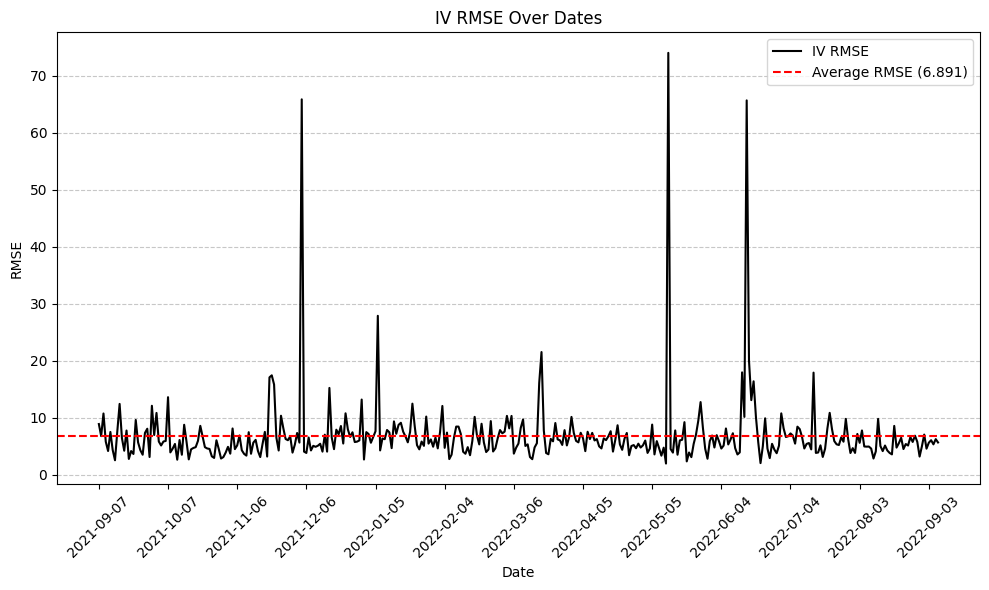

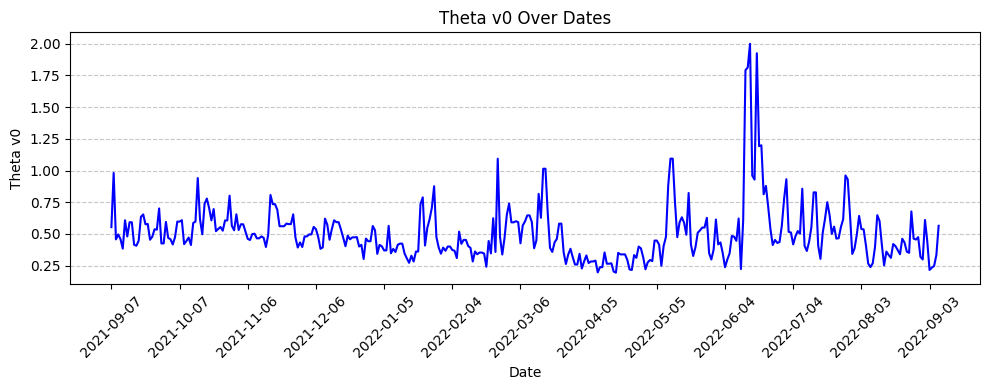

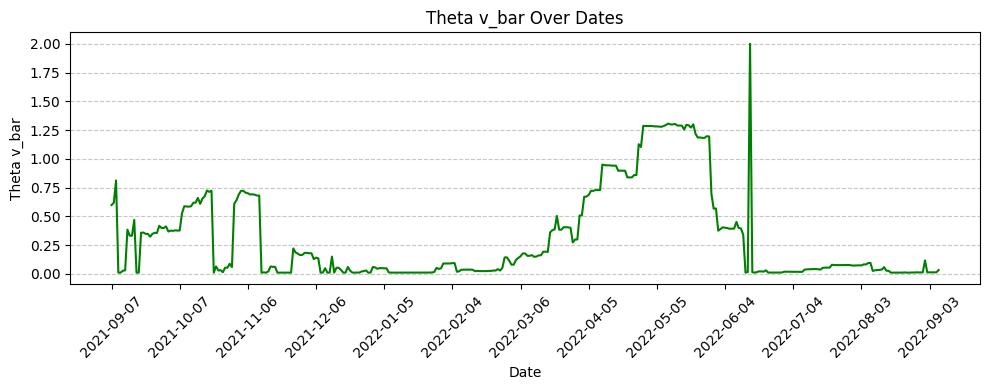

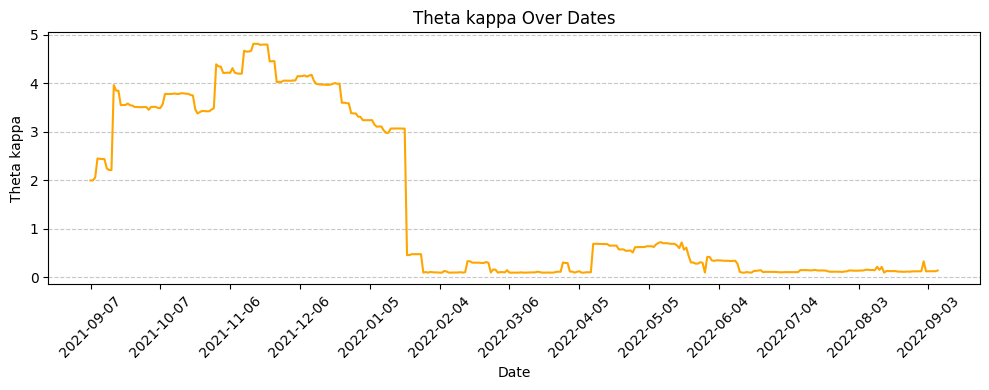

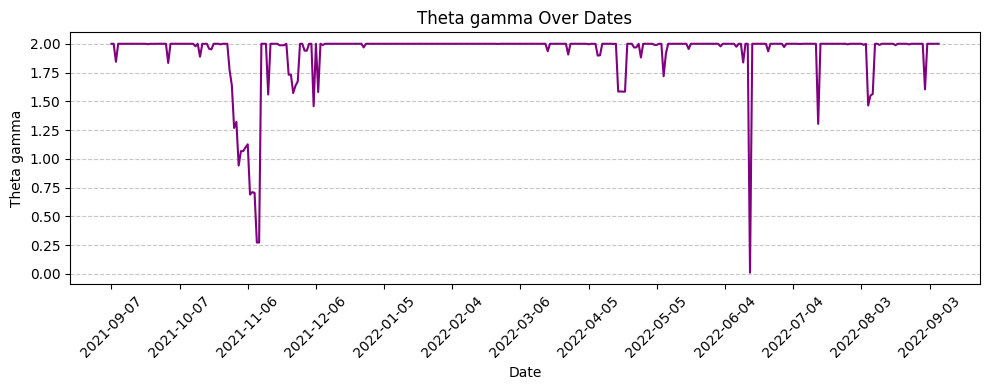

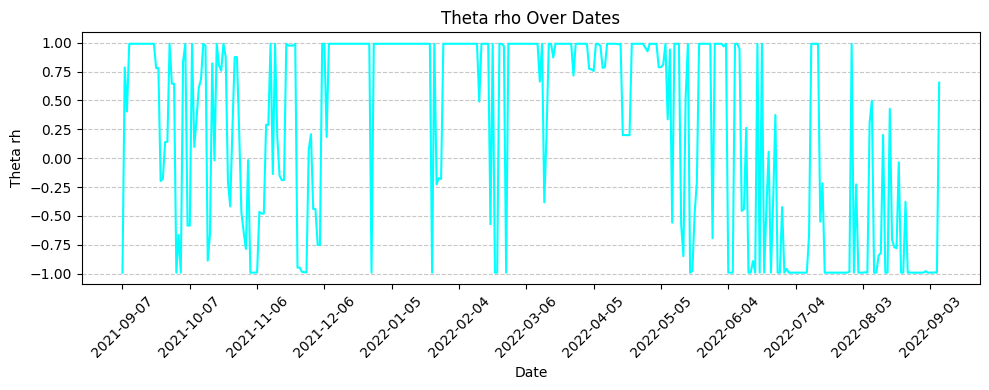

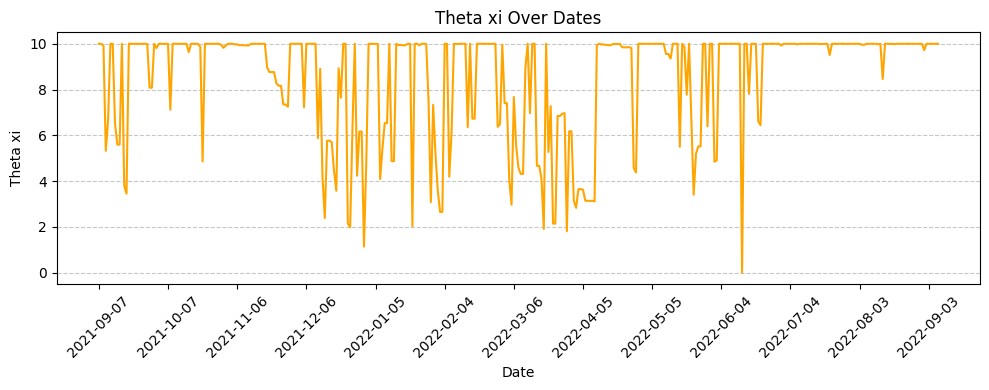

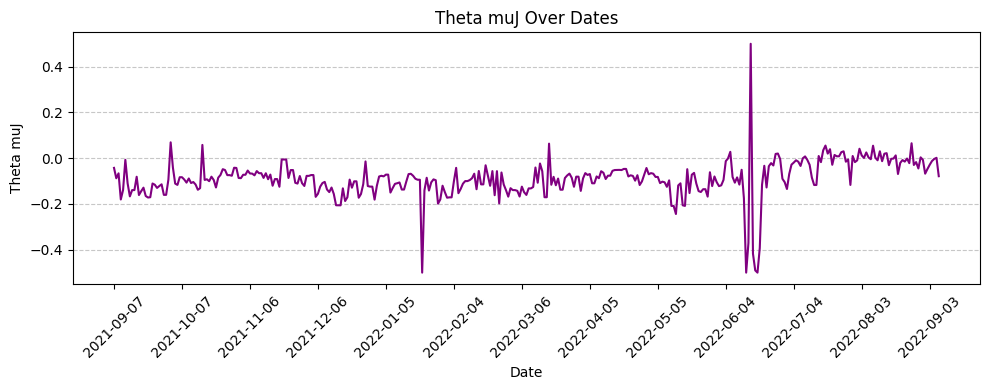

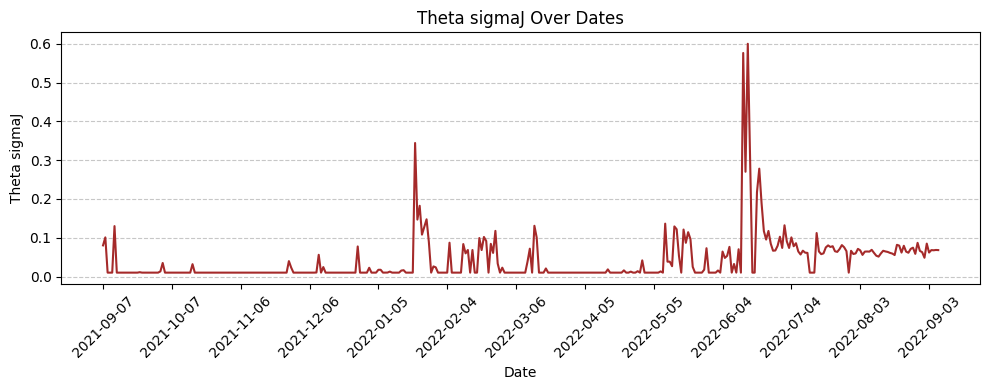

In [74]:
results_bates = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/bates_calibration_results_final.csv')
avg_rmse_bates = results_bates['iv_rmse'].mean()

# v0, v_bar, kappa, gamma, rho
# Plot RMSE over the dates
plt.figure(figsize=(10, 6))
plt.plot(results_bates['date'], results_bates['iv_rmse'], linestyle='-', color='black', label='IV RMSE')
plt.axhline(avg_rmse_bates, color='red', linestyle='--', label=f'Average RMSE ({avg_rmse_bates:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Plot v0 over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_bates['date'], results_bates['theta_v0'], label='Theta v0', color='blue')
plt.xlabel('Date')
plt.ylabel('Theta v0')
plt.title('Theta v0 Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot v_bar over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_bates['date'], results_bates['theta_vbar'], label='Theta vbar', color='green')
plt.xlabel('Date')
plt.ylabel('Theta v_bar')
plt.title('Theta v_bar Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot kappa over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_bates['date'], results_bates['theta_kappa'], label='Theta kappa', color='orange')
plt.xlabel('Date')
plt.ylabel('Theta kappa')
plt.title('Theta kappa Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot gamma over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_bates['date'], results_bates['theta_gamma'], label='Theta gamma', color='purple')
plt.xlabel('Date')
plt.ylabel('Theta gamma')
plt.title('Theta gamma Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot rho over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_bates['date'], results_bates['theta_rho'], label='Theta rho', color='cyan')
plt.xlabel('Date')
plt.ylabel('Theta rh')
plt.title('Theta rho Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot xi over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_bates['date'], results_bates['theta_xi'], label='Theta xi', color='orange')
plt.xlabel('Date')
plt.ylabel('Theta xi')
plt.title('Theta xi Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot muJ over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_bates['date'], results_bates['theta_muJ'], label='Theta muJ', color='purple')
plt.xlabel('Date')
plt.ylabel('Theta muJ')
plt.title('Theta muJ Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot sigmaJ over the dates
plt.figure(figsize=(10, 4))
plt.plot(results_bates['date'], results_bates['theta_sigmaJ'], label='Theta sigmaJ', color='brown')
plt.xlabel('Date')
plt.ylabel('Theta sigmaJ')
plt.title('Theta sigmaJ Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Relative RMSE (Merton, Kou, Heston, Bates):
Medians: 0.34294474966410116 0.4728264858614936 3.944518764847858 0.3566621802653077
Means: 0.37782819578765353 0.49170944361451113 4.859056659864574 0.4114440942838431


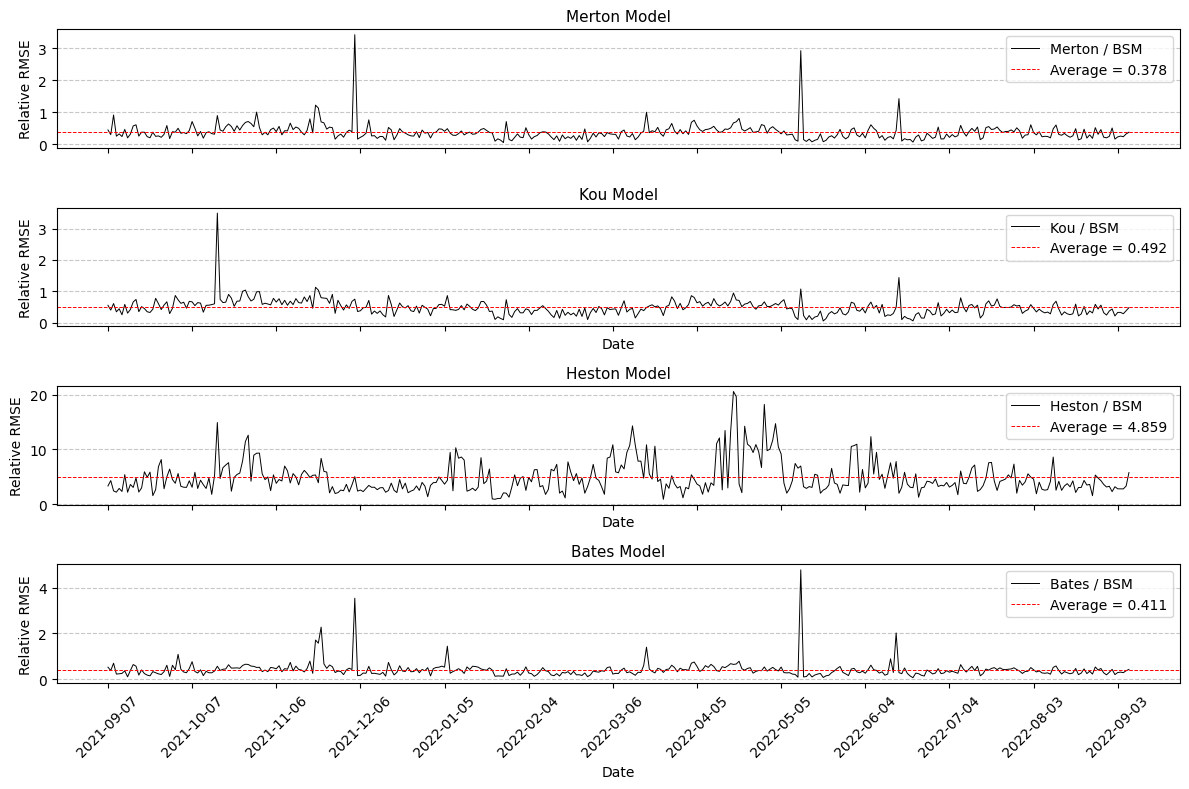

In [75]:
# Compute relative RMSE
rel_rmse_kou = results_kou['iv_rmse'] / bs_results['iv_rmse']
rel_rmse_merton = results_merton['iv_rmse'] / bs_results['iv_rmse']
rel_rmse_heston = results_heston['iv_rmse'] / bs_results['iv_rmse']
rel_rmse_bates = results_bates['iv_rmse'] / bs_results['iv_rmse']

print("Relative RMSE (Merton, Kou, Heston, Bates):")
print("Medians:", rel_rmse_merton.median(), rel_rmse_kou.median(), rel_rmse_heston.median(), rel_rmse_bates.median())
print("Means:", rel_rmse_merton.mean(), rel_rmse_kou.mean(), rel_rmse_heston.mean(), rel_rmse_bates.mean())

# Create the subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 8), sharex=True)

# Merton subplot (now first)
axes[0].plot(results_merton['date'], rel_rmse_merton, linestyle='-', color='black', linewidth=0.7, label='Merton / BSM')
axes[0].axhline(rel_rmse_merton.mean(), color='red', linestyle='--', linewidth=0.7, label=f'Average = {rel_rmse_merton.mean():.3f}')
axes[0].set_ylabel('Relative RMSE')
axes[0].set_title('Merton Model', fontsize=11)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Kou subplot
axes[1].plot(results_kou['date'], rel_rmse_kou, linestyle='-', color='black', linewidth=0.7, label='Kou / BSM')
axes[1].axhline(rel_rmse_kou.mean(), color='red', linestyle='--', linewidth=0.7, label=f'Average = {rel_rmse_kou.mean():.3f}')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Relative RMSE')
axes[1].set_title('Kou Model', fontsize=11)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

# Heston subplot
axes[2].plot(results_heston['date'], rel_rmse_heston, linestyle='-', color='black', linewidth=0.7, label='Heston / BSM')
axes[2].axhline(rel_rmse_heston.mean(), color='red', linestyle='--', linewidth=0.7, label=f'Average = {rel_rmse_heston.mean():.3f}')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Relative RMSE')
axes[2].set_title('Heston Model', fontsize=11)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].legend()

# Bates subplot
axes[3].plot(results_bates['date'], rel_rmse_bates, linestyle='-', color='black', linewidth=0.7, label='Bates / BSM')
axes[3].axhline(rel_rmse_bates.mean(), color='red', linestyle='--', linewidth=0.7, label=f'Average = {rel_rmse_bates.mean():.3f}')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Relative RMSE')
axes[3].set_title('Bates Model', fontsize=11)
axes[3].grid(axis='y', linestyle='--', alpha=0.7)
axes[3].legend()

# Improve layout
plt.xticks(ticks=range(0, len(results_merton), 30), labels=results_merton['date'].iloc[::30], rotation=45)
plt.tight_layout()
plt.show()
